In [2]:
import os
os.chdir('/home/rm/ssd2/langcao/workspace/tablemaster')
!pwd

/home/rm/ssd2/langcao/workspace/tablemaster


In [3]:
import os
import sys
import json
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./')
from evaluate.evaluator import eval_qa, eval_fact

In [4]:
plt.rcParams['font.family'] = 'Calibri'

models = ['gpt4o', 'gpt4m', 'gpt35']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

-72


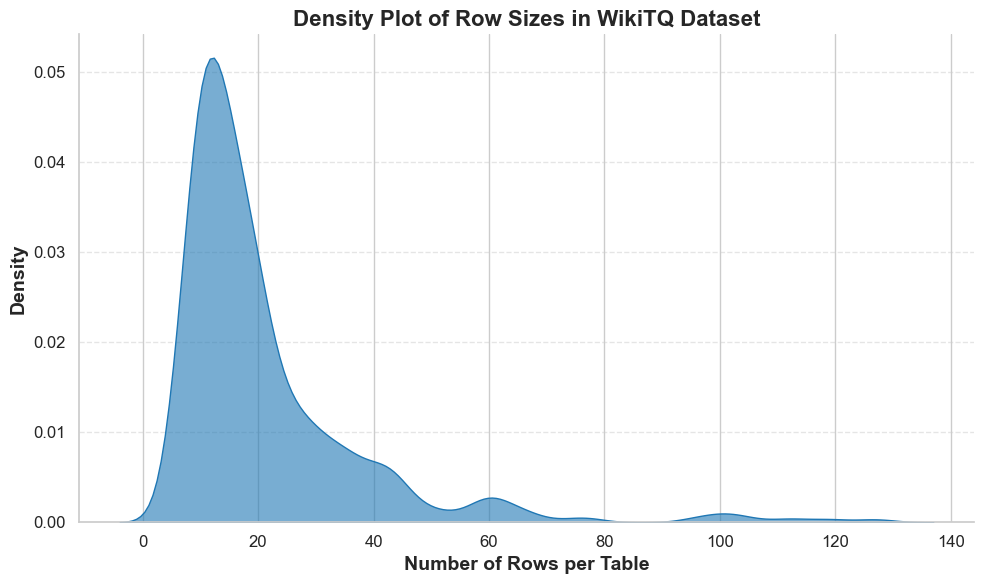

In [48]:
# wiki tq row length
row_sizes = []

with open('data/wikitq/test.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        row_sizes.append(len(data['table']))

# print(len(row_sizes))
old_row_sizes = row_sizes
row_sizes = [i for i in row_sizes if i < 150]
print(len(row_sizes) - len(old_row_sizes))


plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.kdeplot(row_sizes, fill=True, color='#1f77b4', alpha=0.6)
plt.title("Density Plot of Row Sizes in WikiTQ Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of Rows per Table", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Save and display the plot
plt.tight_layout()
plt.savefig('figures/analysis/wikitq_row.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
results = {
    'Peek Size': [2, 4, 10, 15, 25, 50, 100],
    'Accuracy': [
        0.7417127071823204,
        0.7228360957642725,
        0.736878453038674,
        0.7557550644567219,
        0.761049723756906,
        0.7720994475138122,
        0.7813075506445673
    ]
}

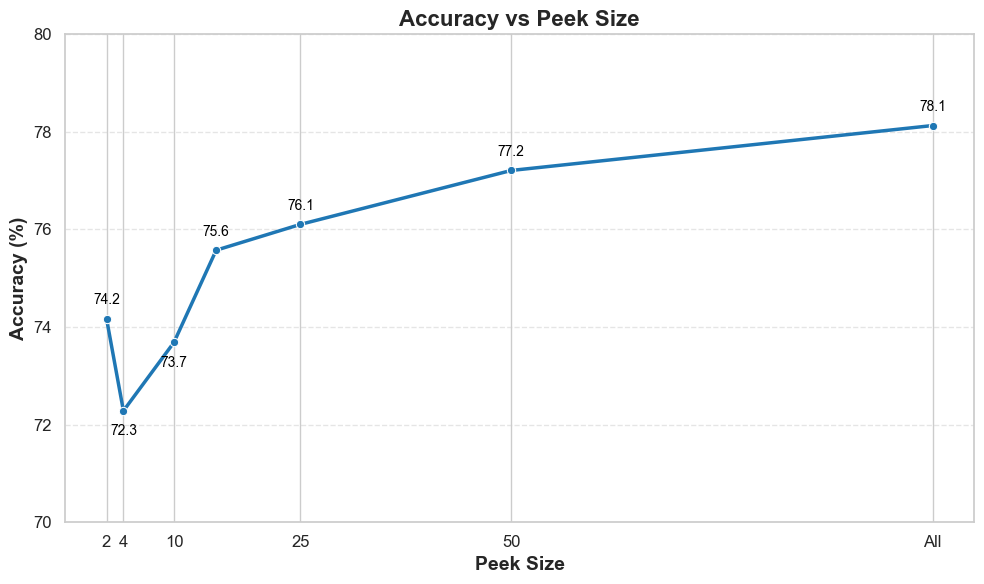

In [49]:
df = pd.DataFrame(results)
df['Accuracy'] = df['Accuracy'] * 100  # Convert accuracy to percentage

# Plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x='Peek Size', y='Accuracy', marker='o', color='#1f77b4', linewidth=2.5)


# Annotate each point
for i, row in df.iterrows():
    plt.text(
        row['Peek Size'],  # X-coordinate
        row['Accuracy'] + 0.3 if i not in [1, 2] else row['Accuracy'] - 0.5,  # Y-coordinate (slightly above the point)
        f"{row['Accuracy']:.1f}",  # Format accuracy value
        fontsize=10,
        ha='center',
        color='black'
    )

# Add labels and title
plt.title("Accuracy vs Peek Size", fontsize=16, fontweight='bold')
plt.xlabel("Peek Size", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=14, fontweight='bold')
# plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(70, 80)  # Adjusted for the accuracy range

custom_ticks = [2, 4, 10, 25, 50, 'All']  # Define custom tick labels
plt.xticks(ticks=[2, 4, 10, 25, 50, 100], labels=custom_ticks, fontsize=12)  # Add custom ticks


# Save and show the plot
plt.tight_layout()
plt.savefig('figures/analysis/peek.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
